In [2]:
!pip install wordcloud

   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.2 kB ? eta -:--:--
 


[notice] A new release of pip is available: 24.1.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from wordcloud import WordCloud

In [38]:
# doenload necessary models from nltk corpus
nltk.download('product_reviews_1')
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package product_reviews_1 to
[nltk_data]     C:\Users\prana\AppData\Roaming\nltk_data...
[nltk_data]   Package product_reviews_1 is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\prana\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\prana\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [39]:
file_ids = nltk.corpus.product_reviews_1.fileids()
print(file_ids)

['Apex_AD2600_Progressive_scan_DVD player.txt', 'Canon_G3.txt', 'Creative_Labs_Nomad_Jukebox_Zen_Xtra_40GB.txt', 'Nikon_coolpix_4300.txt', 'Nokia_6610.txt', 'README.txt']


In [40]:
# Using CANON G3 text review file for the exercise
reviews = nltk.corpus.product_reviews_1.reviews(file_ids[1])
raw_text = nltk.corpus.product_reviews_1.raw(file_ids[1])
review_sentences = nltk.corpus.product_reviews_1.sents(file_ids[1])

In [41]:
print(f"Total no. of review available : {len(reviews)}")

Total no. of review available : 45


In [42]:
print(f"Total review sentences : {len(review_sentences)}")

Total review sentences : 597


In [43]:
review_titles = {f"rev_{i+1}": reviews[i].title for i in range(len(reviews))}
for tit in review_titles.keys():
    print(f"{tit}: {review_titles[tit]}")

rev_1: excellent picture quality / color
rev_2: cool toy
rev_3: canon g3 ? incredible camera
rev_4: great camera
rev_5: have n't had practice but i 'm already in love with it
rev_6: excellent for the semi-serious amateur
rev_7: fantastic digital camera
rev_8: the best of everything
rev_9: pure class & quality - a work of craftmanship
rev_10: great camera
rev_11: if you love an slr 35mm but need to go digital
rev_12: outstanding camera
rev_13: love my new g 3
rev_14: noise level
rev_15: the pictures are brillient
rev_16: great gadget
rev_17: ok for a digital camera
rev_18: within its limitations
rev_19: knock your socks off great
rev_20: great digital camera
rev_21: canon never ceases to amaze
rev_22: love the g2
rev_23: awesome pro-sumer camera
rev_24: upgraded from g2 and not looking back
rev_25: the catch
rev_26: 100 % happy
rev_27: the best 4mp out there
rev_28: love it more and more
rev_29: the last digital camera i 'll buy
rev_30: boxy ? no -- gorgeous
rev_31: very good choice in 

In [44]:
review_texts = []
for i in range(len(reviews)):
    review_lines = reviews[i].review_lines
    line = ''
    for j in range(len(review_lines)):
        line += ' '.join(review_lines[j].sent)
    review_texts.append(line)

In [45]:
print("Complete Review Texts".center(150))
i = 1
for rev in review_texts:
        print(f"Title--> {review_titles[f'rev_{i}']} :\n\n{rev}\n")
        print(f"Summary--> \nLen of review : {len(rev.split())} words.\n")

                                                                Complete Review Texts                                                                 
Title--> excellent picture quality / color :

i recently purchased the canon powershot g3 and am extremely satisfied with the purchase .the camera is very easy to use , in fact on a recent trip this past week i was asked to take a picture of a vacationing elderly group .after i took their picture with their camera , they offered to take a picture of us .i just told them , press halfway , wait for the box to turn green and press the rest of the way .they fired away and the picture turned out quite nicely . ( as all of my pictures have thusfar ) .a few of my work constituants owned the g2 and highly recommended the canon for picture quality .i ' m easily enlarging pictures to 8 1 / 2 x 11 with no visable loss in picture quality and not even using the best possible setting as yet ( super fine ) .ensure you get a larger flash , 128 or 256 , 

In [46]:
words_per_review = [len(rev) for rev in review_texts]

In [47]:
print(f"Largest review: {max(words_per_review)}")
print(f"Smallest review: {min(words_per_review)}")
print(f"Average words per review: {sum(words_per_review)/len(words_per_review):.0f}")

Largest review: 5568
Smallest review: 73
Average words per review: 1255


In [48]:
sent_length = [len(rev) for rev in review_sentences]

In [49]:
print(f"Largest sentence: {max(sent_length)}")
print(f"Smallest sentence: {min(sent_length)}")
print(f"Average words per review: {sum(sent_length)/len(sent_length):.0f}")

Largest sentence: 84
Smallest sentence: 1
Average words per review: 20


In [50]:
titles = ' '.join(list(review_titles.values()))

In [51]:
tokens = nltk.word_tokenize(titles)

In [52]:
# Word Frequency Distribution
freq_dist = pd.DataFrame({"words" : nltk.FreqDist(tokens).keys(), "freq": nltk.FreqDist(tokens).values()})
freq_dist.sort_values('freq',ascending=False, inplace=True, ignore_index=True)
freq_dist.freq.sum()

213

In [53]:
stp_words = nltk.corpus.stopwords.words('english')

In [54]:
stp_wrd_freq_dist = freq_dist[freq_dist.words.isin(stp_words)].reset_index(drop=True)
stp_wrd_freq_dist[:10]

,words,freq
0,the,11
1,it,5
2,i,5
3,more,4
4,to,3
5,of,3
6,for,3
7,but,3
8,a,2
9,and,2


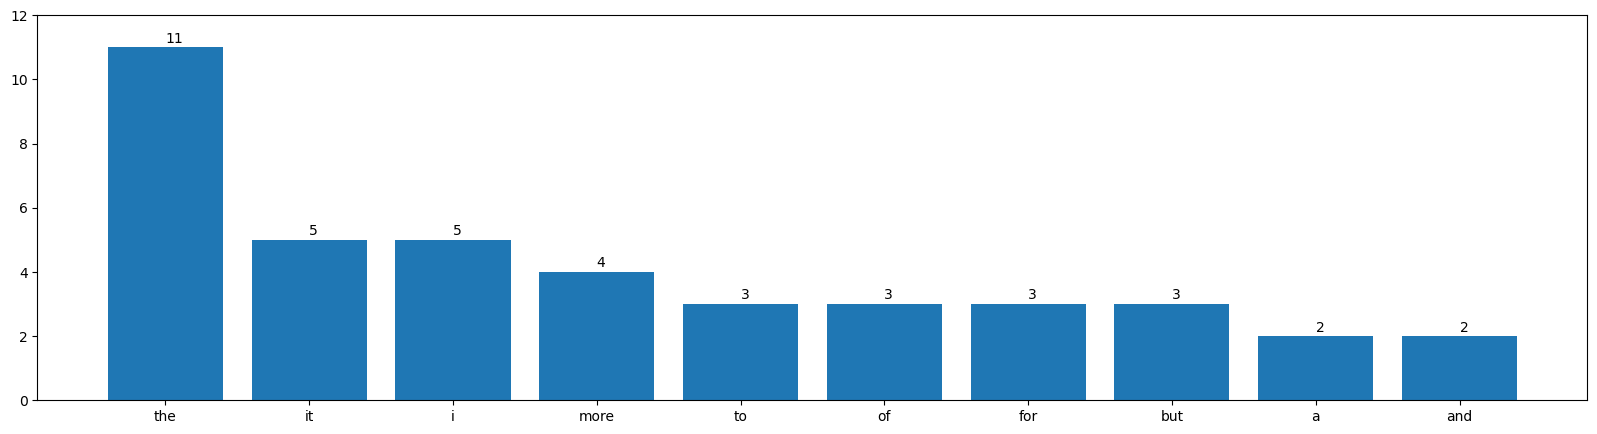

In [55]:
plt.figure(figsize=(20,5))
plt.bar(x = stp_wrd_freq_dist.words[:10], height=stp_wrd_freq_dist.freq[:10])
for i in range(10):
    plt.annotate(f"{stp_wrd_freq_dist.freq[i]}",xy = (i, stp_wrd_freq_dist.freq[i]+0.15))
    
plt.ylim(0,12)
plt.show()

In [56]:
top_20_words = freq_dist[~(freq_dist.words.isin(stp_words))].reset_index(drop=True)
top_20_words

,words,freq
0,camera,14
1,best,7
2,digital,6
3,love,6
4,great,6
...,...,...
91,noise,1
92,3,1
93,g,1
94,new,1


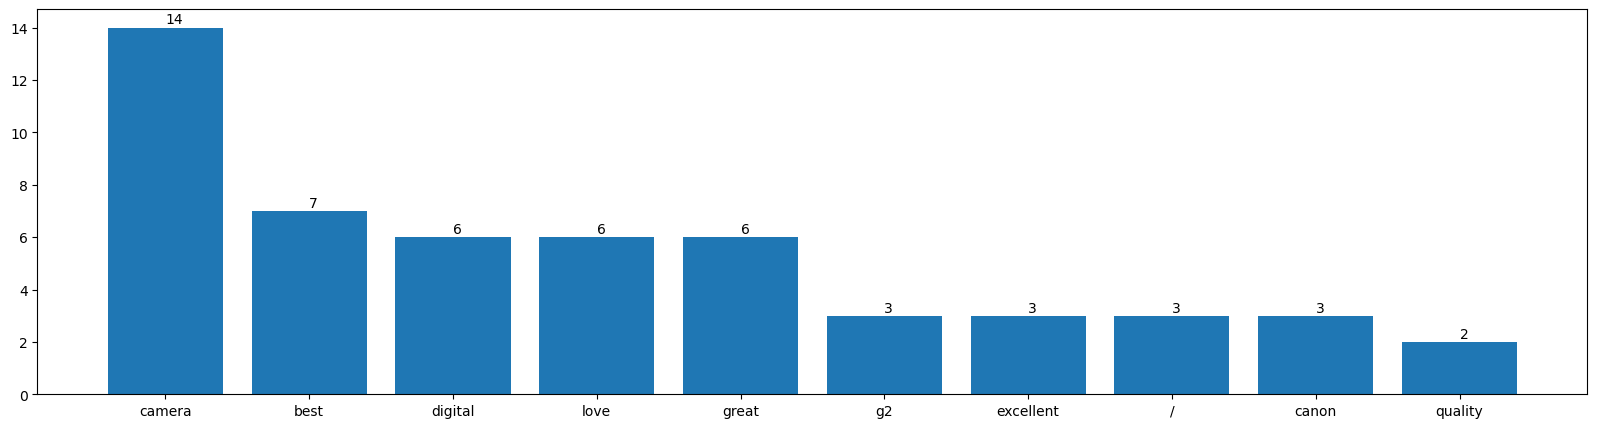

In [57]:
plt.figure(figsize=(20,5))
plt.bar(x = top_20_words.words[:10], height=top_20_words.freq[:10])
for i in range(10):
    plt.annotate(f"{top_20_words.freq[i]}",xy = (i, top_20_words.freq[i]+0.15))
    
#plt.ylim(0,12)
plt.show()

In [58]:
word_list = ['camera', 'canon', 'g2', 'digital']
most_list = top_20_words[~(top_20_words.isin(word_list))]

In [59]:
most_list = most_list[most_list.words.notna() & most_list.words.str.isalpha()]

In [62]:
word_freq = {word : freq for word, freq in zip(most_list.words, most_list.freq)}

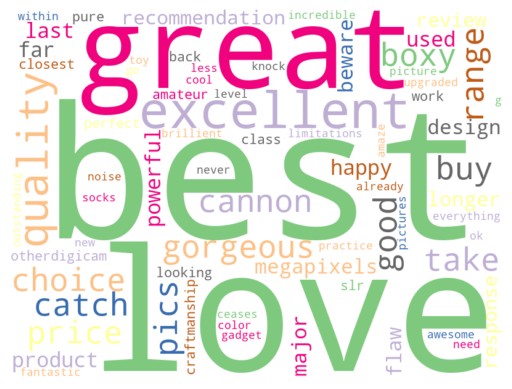

In [63]:
wordcloud = WordCloud(width=800, height=600, background_color= 'white', colormap='Accent')
wordcloud.generate_from_frequencies(frequencies=word_freq)
plt.figure()
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()